<h1><center>Exercice de Machine Learning sur un jeu de donnée de vin avec l'algorithme K-means qui est un algorithme de Machine Learning non supervisé</center></h1>

En supposant qu'il existe n points de données, l'algorithme du **K-means** fonctionne comme suit :

- **Étape 1** : initialisation - choisissez k points aléatoires comme centres de cluster, appelés centroïdes
- **Étape 2**: affectation de cluster - affectez chaque point de données à son centroïde le plus proche en fonction de sa distance à chaque centroïde, et qui forme k clusters
- **Étape 3** : mise à jour du centroïde - pour chaque nouveau cluster, calculez son centroïde en faisant la moyenne de tous les points attribués au cluster
- **Étape 4** : répétez les étapes 2 et 3 jusqu'à ce qu'aucune des affectations de cluster ne change ou qu'elle atteigne le nombre maximal d'itérations

Dans cet exercice, nous analysons le résultat d'une analyse chimique des vins. Cette analyse a été faite en considérant plusieurs caractéristiques des vins comme le taux d'alcool...Et le but est d'essayer de regrouper des observations similaires et de déterminer le nombre de clusters possibles.

In [49]:
#Importations nécessaire
import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#Chargement et affichage des données de notre dataset
wine = load_wine()
wine_dataset = pd.DataFrame(wine.data, columns=wine.feature_names)
wine_dataset

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


Notre dataset contient 178 lignes et 13 colonnes qui sont les caractéristiques chimiques concernant chacun des vins que nous disposons sur chaque ligne

In [4]:
wine_dataset.shape

(178, 13)

In [5]:
#Une vue des statistiques sur notre dataset
wine_dataset.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


On constate que pour chacune des lignes de notre dataset, il n'y a pas de valeur pour aucune des  colonnes 

Aussi, le taux de **alcohol** (alcool) varie entre **11** et **14**,  alors que le taux de **magnesium** par exemple varie entre **70** et **162**. Pour pouvoir faire une bonne analyse, nous devons rendre toute nos données à la même échelle pour y voir plus clair

Nous allons observer les differentes correlations entre nos differentes colonnes pour voir ceux qui ont une forte relation et qui pourraient nous aider à faire une bonne analyse

In [6]:
wine_dataset.corr()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


Nous allons voir cette correlation entre les colonnes avec des graphes. Et puisque, notre algorithme (**K-Mean**) veut consister à séparer les vins en différentes catégories ou groupes (clusters), nous allons beaucoup plus nous pencher sur les colonnes dont le le graphes nous permettent plus de distinguer des groupes. Ici nous allons nous interessé à 3 groupes

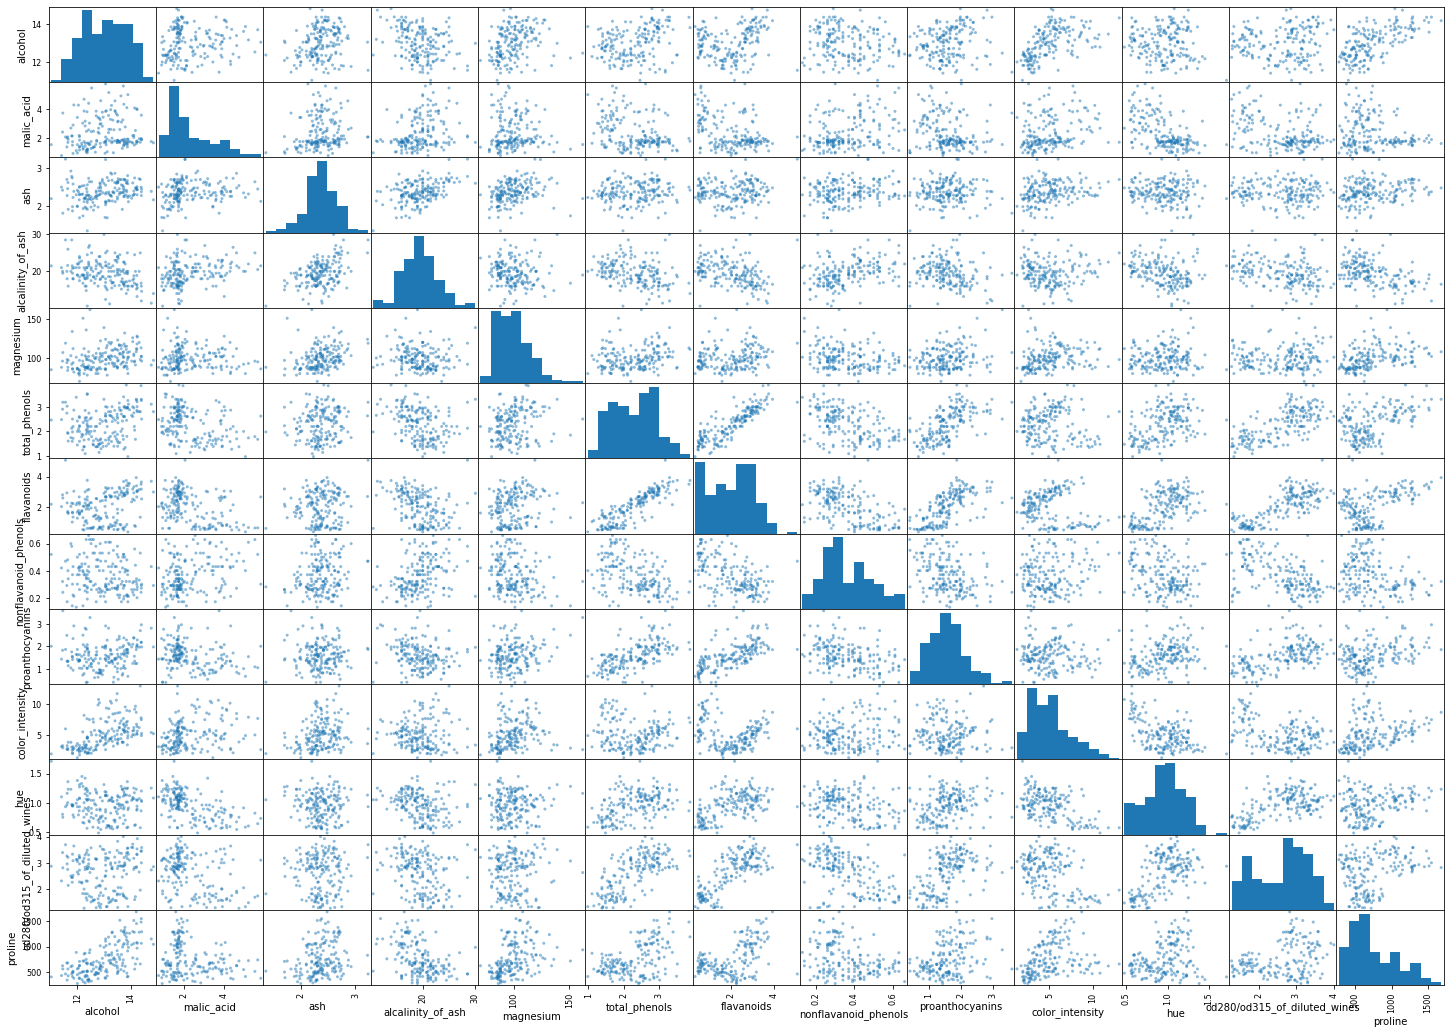

In [21]:
scatter_matrix(wine_dataset, figsize=(25,18))
plt.show()

Quand on observe bien, la colonne alcohol et total_phenol semble faire 3 groupe vu d'oeil, on va y voir plus claire

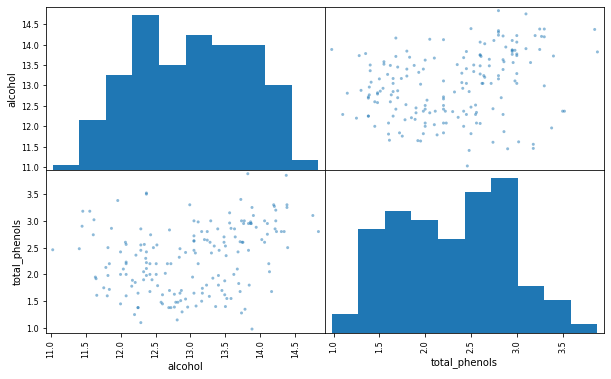

In [25]:
scatter_matrix(wine_dataset[['alcohol', 'total_phenols']], figsize=(10,6))
plt.show()

Nous allons utiliser ces deux colonnes pour entrainer notre model pour le moment. C'est un choix qui se base sur le fait que nous voulons séparer notre ensemble de données en trois groupe et que le graphe de point semble s'y rapprocher

Nous allons mieux voir celà en mettant les données de ces deux colonnes à la même échelle

In [26]:
#Selection de nos vaariables
X = wine_dataset[['alcohol', 'total_phenols']]

Pour la mise à l'échelle nous allons utiliser StandarScaler qui est une classe implémenté en python

Il recalcule chaque donnée x en z suivant la formule :
# z =  ( x - moy ) / ecart_type 
où moy est la moyenne des données de la colonne

In [29]:
#Instanciation de la classe
scale = StandardScaler()
#Calcul de la moyenne de l'écart-type de chaque colonne de X
scale.fit(X)

StandardScaler()

In [30]:
#Les valeurs sont : 
#La moyenne
print(f"Moyennes  =  {scale.mean_}")
#L'écart-type
print(f"Ecart-types  =  {scale.scale_}")

Moyennes  =  [13.00061798  2.29511236]
Ecart-types  =  [0.80954291 0.62409056]


In [32]:
#Mise à l'échelle des données de X
X_scaled = scale.transform(X)
#Affichage de X mis à l'échelle
X_scaled

array([[ 1.51861254,  0.80899739],
       [ 0.24628963,  0.56864766],
       [ 0.19687903,  0.80899739],
       [ 1.69154964,  2.49144552],
       [ 0.29570023,  0.80899739],
       [ 1.48155459,  1.56209322],
       [ 1.71625494,  0.32829793],
       [ 1.3086175 ,  0.48853108],
       [ 2.25977152,  0.80899739],
       [ 1.0615645 ,  1.09741707],
       [ 1.3580281 ,  1.04934713],
       [ 1.38273339, -0.15240153],
       [ 0.92568536,  0.48853108],
       [ 2.16095032,  1.28969686],
       [ 1.70390229,  1.61016317],
       [ 0.77745356,  0.88911397],
       [ 1.60508109,  0.80899739],
       [ 1.02450655,  1.04934713],
       [ 1.46920194,  1.61016317],
       [ 0.78980621,  0.64876424],
       [ 1.3086175 ,  1.1294637 ],
       [-0.08723191,  0.18408809],
       [ 0.87627476,  0.5045544 ],
       [-0.18605311,  0.2962513 ],
       [ 0.61686912,  0.37636788],
       [ 0.06099988,  0.53660103],
       [ 0.48098997,  0.88911397],
       [ 0.36981612,  0.16806478],
       [ 1.07391715,

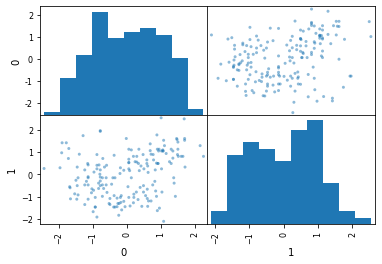

In [35]:
#Visualisation de X_scaled
scatter_matrix(pd.DataFrame(X_scaled))
plt.show()

Si on regarde bien comparemment au graphe précédent, maintenant nos données sont tous centrées autour de zéros et varie maintenant de -2.5 à 2.5

Après la mise à l'échelle, la moyenne de nos colonnes est très proche de zéro et leur écart-type proche de 1

In [37]:
#La moyenne
X_scaled.mean(axis=0)

array([ 7.84141790e-15, -1.95536471e-16])

In [38]:
#L'écart-type
X_scaled.std(axis=0)

array([1., 1.])

In [40]:
#Creation et entrainement du model avec 3 clusters
model  = KMeans(n_clusters=3)
model.fit(X_scaled)

KMeans(n_clusters=3)

In [41]:
#Faire les prédictions
y_pred = model.predict(X_scaled)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 2, 2, 2,
       1, 2, 1, 2, 0, 1, 0, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1], dtype=int32)

Notre model a donc comme attendu regroupé nos données en trois catégories, la première a l'indice 0, puis le duexieme 1, et le troisieme 2. Pour chaque donnée donc le model prévoit son groupe d'appartenance en lui accordant le numéro du groupe

**Les differents centre de chaque groupe ont pour coordonées dans X_scaled :**

In [42]:
model.cluster_centers_

array([[ 0.07498401, -1.14070754],
       [ 0.92017418,  0.87087204],
       [-1.06309124,  0.06418028]])

Nous allons afficher les données de chaque groupe afin de mieux visualiser ainsi que les centroids (les centres de chaque groupe)

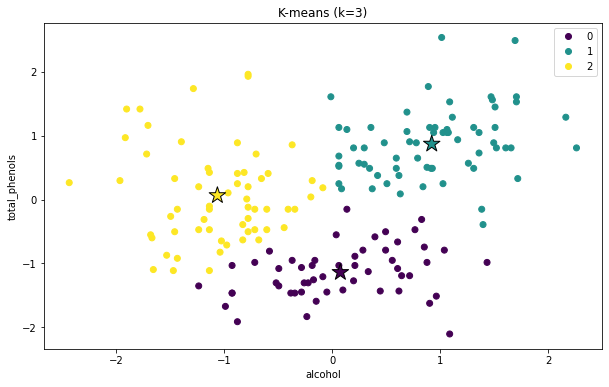

In [51]:
plt.figure(figsize=(10,6))
graphe = plt.scatter(X_scaled[:,0], X_scaled[:,1], c=y_pred)
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], marker='*', c=[0,1,2], s= 300, edgecolors='k')
plt.xlabel("alcohol")
plt.ylabel("total_phenols")
plt.title("K-means (k=3)")
plt.legend(handles=graphe.legend_elements()[0], labels = [0,1,2])
plt.show()

Comme on le voit notre model a regroupé nos vins en trois groupes : ceux avec un fort taux de phenol et un faible taux d'alcool (les points en jaunes), ceux à faible taux de phénol et fort taux d'alcool (les violets) et enfin  ceux avec un fort taux de phénol et un fort taux d'alcool (les verts)

### Prédictions

Supposons maintenant que nous avons un nouveau vin de taux d'alcool 13 et taux de phénol 2.5

Nous allons prédire à quel groupe ce vin appartient.

In [50]:
new_data  = np.array([[13, 2.5]])
new_data_scaled = scale.transform(new_data)
model.predict(new_data_scaled)

array([1], dtype=int32)

On constate que notre nouveau graphe est du groupe 1, donc des vert. Il a donc un fort taux d'alcool et un fort taux de phénol

## La méthode du coude

Dernièrement, nous avons choisi 3 comme le nombre de clusters, mais on voudrait bien avoir le nombre optimal de cluster pour affiner notre modele.  Pour ça nous allons utiliser la méthode du coude.

Notre model possède un attribut **inertia** qui est la somme des carré de chaque point d'un cluster par rappor à son centroid. Nous allons faire varier notre **k**, et faire un graphe de comment évolue **inertia**

Text(0, 0.5, 'Inertia')

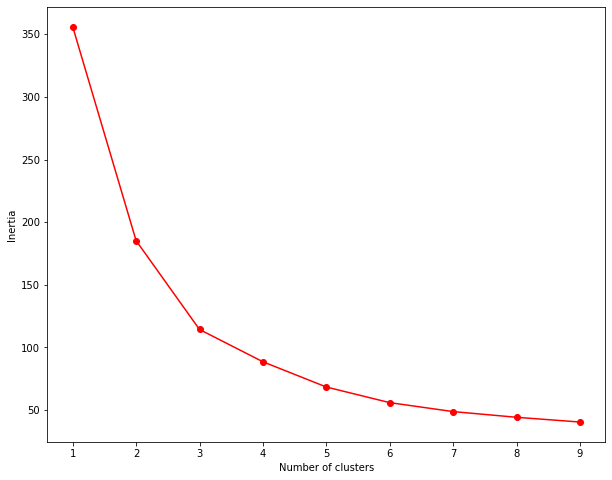

In [59]:
inertia = []
for i in np.arange(1,10):
    km = KMeans(n_clusters=i)
    km.fit(X_scaled)
    inertia.append(km.inertia_)
    
plt.figure(figsize=(10,8))
plt.plot(np.arange(1,10), inertia, marker='o', c='r')
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")

Avec cette technique, le nombre de cluster optimal est celui à parti duquel notre courbe ne décroit plus à grand pas et sur notre figure ici, le nombre de cluster optimal est bien **3**. Cette courbe ressemble à un bras avec la position du cluster optimal au niveau du coude c'est pourquoi elle est appelée **la méthode du coude**

Nous pouvons essayer d'utiliser cette méthode pour entrainer notre modele en utilisant toutes les 13 caractéristiques des vins afin de voir le nombre optimal de cluster

In [60]:
X_total = wine_dataset
scale.fit(X_total)
X_total_scaled = scale.transform(X_total)

Text(0, 0.5, 'Inertia')

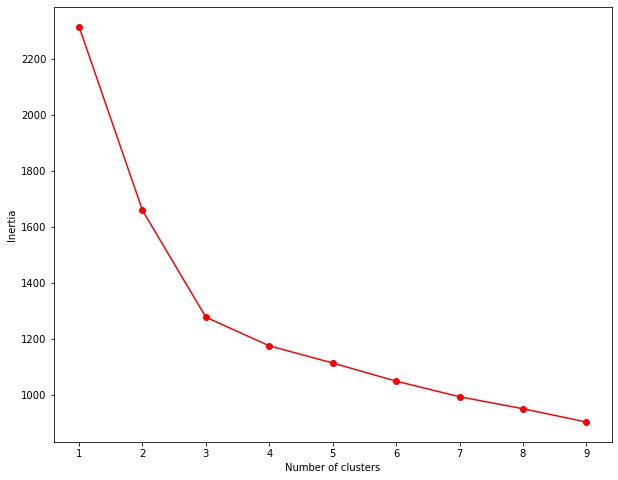

In [61]:
inertia = []
for i in np.arange(1,10):
    km = KMeans(n_clusters=i)
    km.fit(X_total_scaled)
    inertia.append(km.inertia_)
    
plt.figure(figsize=(10,8))
plt.plot(np.arange(1,10), inertia, marker='o', c='r')
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")

Ici aussi on voit que le k optimal est 3

On va entrainer un second model avec ce k

In [66]:
model_final = KMeans(n_clusters=3)
model_final.fit(X_total_scaled)
y_pred_total = model_final.predict(X_total_scaled)
y_pred_total

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

# Fin du notebook